# Lab 1.02 - Android Persistence

Import all necessary Python libraries and create a variable `android_persistence` to load the dataset [android_persistence_cpu.csv](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/android_persistence_cpu.csv). See the [code book](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/android_persistence_cpu.md) for more info on the contents. Note this file is not stored as a regular CSV file! You may need to tweak the parameters of the import function to load the file correctly.

In [32]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

android = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/android_persistence_cpu.csv', sep=';')

android.head()


,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Explore the dataset:

- How many variables and observations are present in the dataset?
- What is the level of measurement of each variable?
- Perform the conversion of the qualitative variables to the appropriate type (and specify the order of ordinal variables).
- List the data types in the dataset.

In [33]:


print(android.PersistenceType.unique())

print(android.DataSize.unique())


['Sharedpreferences' 'GreenDAO' 'SQLLite' 'Realm']
['Small' 'Medium' 'Large']


In [35]:
android.shape

persistenceType = CategoricalDtype(categories=['Sharedpreferences', 'GreenDAO', 'SQLLite', 'Realm'], ordered=False)

dataSizeType = CategoricalDtype(categories=['Small', 'Medium', 'Large'],ordered=True)

android.PersistenceType = android.PersistenceType.astype(persistenceType)
android.DataSize = android.DataSize.astype(dataSizeType)

Describe each variable.

In [36]:
print(android.DataSize.describe())

print('*'*50)

print(android.PersistenceType.describe())

count       300
unique        3
top       Small
freq        120
Name: DataSize, dtype: object
**************************************************
count          300
unique           4
top       GreenDAO
freq            90
Name: PersistenceType, dtype: object


What unique values are there for the variables `PersistenceType` and `DataSize`? How often does each value occur?

<Axes: xlabel='DataSize', ylabel='count'>

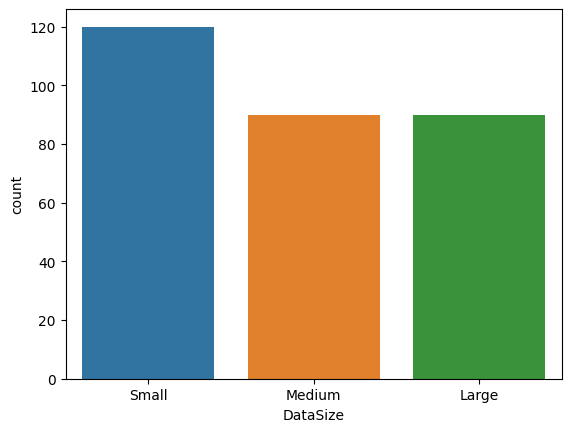

In [37]:
sns.countplot(data=android, x='DataSize')

<Axes: xlabel='PersistenceType', ylabel='count'>

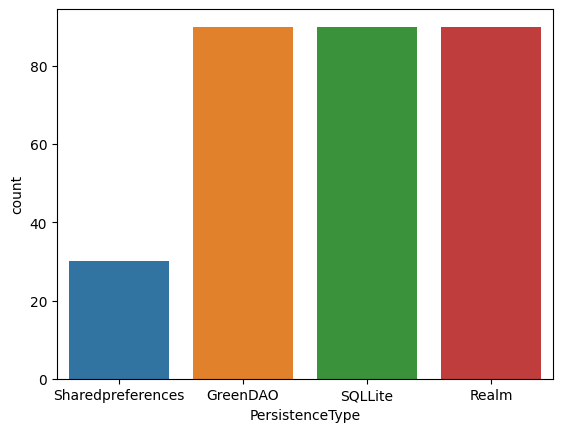

In [38]:
sns.countplot(data=android, x='PersistenceType')

In this dataset, it is especially interesting to know how often each unique combination of `PersistenceType` and `DataSize` occurs. Figure out how to use the Pandas function `crosstab()` to create a so-called contingency table for these variables. By the way, this concept will return in Module 4 (examining the relationship between 2 qualitative variables).

In [44]:
pd.crosstab(android.DataSize, android.PersistenceType, margins=True)

PersistenceType,Sharedpreferences,GreenDAO,SQLLite,Realm,All
DataSize,,,,,
Small,30,30,30,30,120
Medium,0,30,30,30,90
Large,0,30,30,30,90
All,30,90,90,90,300
